In [2]:
from coreset_streaming import Coreset_Streaming
import numpy as np
import random 
import matplotlib.pyplot as plt

In [3]:
a = Coreset_Streaming(10000)
b = Coreset_Streaming(10000)

In [4]:
def add_n_points_to_cs(cs, n, r):
    """ Args:
            cs: coreset
            n: number of points to add
            r: range from 0 to r (inclusive) to sample from
    """
    points = []
    for i in range(n):
        point = [random.randint(0, r), random.randint(0,r)]
        cs.add_point(point)

In [5]:
n = 100
r = 50
add_n_points_to_cs(a, n, r)
add_n_points_to_cs(b, n, r)

In [6]:
a.build_coreset()

In [7]:
b.build_coreset()

In [8]:
a.coreset

[([44, 30], 1),
 ([22, 49], 2),
 ([32, 19], 1),
 ([31, 23], 1),
 ([25, 40], 1),
 ([1, 29], 1),
 ([43, 32], 1),
 ([35, 28], 2),
 ([18, 32], 1),
 ([16, 41], 1),
 ([14, 0], 1),
 ([31, 32], 1),
 ([14, 18], 1),
 ([5, 48], 1),
 ([3, 20], 1),
 ([10, 42], 1),
 ([40, 29], 1),
 ([36, 32], 1),
 ([28, 21], 1),
 ([28, 6], 1),
 ([23, 11], 1),
 ([42, 12], 1),
 ([5, 12], 1),
 ([38, 49], 2),
 ([26, 32], 2),
 ([23, 18], 1),
 ([49, 35], 1),
 ([31, 27], 2),
 ([21, 41], 1),
 ([45, 14], 1),
 ([24, 16], 1),
 ([30, 41], 1),
 ([42, 36], 1),
 ([9, 27], 1),
 ([20, 6], 2),
 ([30, 4], 1),
 ([31, 1], 1),
 ([28, 36], 1),
 ([0, 15], 1),
 ([17, 8], 1),
 ([24, 0], 1),
 ([8, 32], 1),
 ([6, 33], 1),
 ([27, 15], 1),
 ([20, 24], 1),
 ([12, 19], 2),
 ([18, 13], 1),
 ([34, 4], 1),
 ([5, 45], 1),
 ([15, 4], 1),
 ([11, 6], 1),
 ([43, 10], 1),
 ([31, 18], 1),
 ([39, 45], 1),
 ([13, 49], 1),
 ([41, 50], 1),
 ([49, 31], 1),
 ([19, 48], 1),
 ([42, 31], 1),
 ([6, 50], 1),
 ([47, 17], 1),
 ([42, 28], 1),
 ([36, 28], 1),
 ([49, 48], 

In [9]:
len(a.coreset)

93

In [10]:
b.coreset

[([33, 25], 1),
 ([19, 16], 1),
 ([7, 38], 1),
 ([10, 17], 2),
 ([23, 9], 1),
 ([36, 6], 1),
 ([1, 1], 1),
 ([10, 18], 1),
 ([17, 47], 2),
 ([22, 45], 1),
 ([33, 0], 1),
 ([36, 27], 1),
 ([37, 28], 1),
 ([36, 10], 1),
 ([15, 39], 1),
 ([7, 32], 1),
 ([16, 25], 1),
 ([43, 23], 1),
 ([50, 49], 2),
 ([29, 5], 1),
 ([30, 40], 1),
 ([26, 9], 1),
 ([5, 7], 1),
 ([43, 20], 2),
 ([41, 4], 1),
 ([18, 21], 1),
 ([24, 11], 1),
 ([8, 50], 1),
 ([32, 38], 1),
 ([24, 42], 1),
 ([30, 46], 1),
 ([48, 47], 1),
 ([31, 16], 1),
 ([28, 15], 1),
 ([6, 46], 1),
 ([42, 10], 1),
 ([17, 1], 1),
 ([9, 29], 1),
 ([29, 1], 1),
 ([28, 44], 1),
 ([30, 6], 1),
 ([45, 35], 1),
 ([7, 13], 1),
 ([31, 29], 1),
 ([45, 17], 1),
 ([48, 10], 1),
 ([40, 13], 1),
 ([35, 31], 1),
 ([15, 31], 1),
 ([34, 12], 1),
 ([7, 25], 1),
 ([14, 44], 1),
 ([20, 18], 1),
 ([11, 29], 1),
 ([34, 17], 2),
 ([1, 2], 1),
 ([47, 18], 1),
 ([46, 33], 1),
 ([33, 33], 1),
 ([47, 34], 1),
 ([49, 32], 1),
 ([8, 0], 1),
 ([49, 27], 1),
 ([12, 32], 1),


In [11]:
len(b.coreset)

95

In [12]:
a.can_union(b)

True

In [13]:
a.union(b)

In [14]:
a.coreset

[([44, 30], 1),
 ([22, 49], 2),
 ([32, 19], 1),
 ([31, 23], 1),
 ([25, 40], 1),
 ([1, 29], 2),
 ([43, 32], 1),
 ([35, 28], 2),
 ([18, 32], 1),
 ([16, 41], 1),
 ([14, 0], 2),
 ([31, 32], 1),
 ([14, 18], 1),
 ([5, 48], 1),
 ([3, 20], 1),
 ([10, 42], 1),
 ([40, 29], 1),
 ([36, 32], 1),
 ([28, 21], 1),
 ([28, 6], 1),
 ([23, 11], 1),
 ([42, 12], 1),
 ([5, 12], 1),
 ([38, 49], 2),
 ([26, 32], 2),
 ([23, 18], 1),
 ([49, 35], 1),
 ([31, 27], 2),
 ([21, 41], 1),
 ([45, 14], 1),
 ([24, 16], 1),
 ([30, 41], 2),
 ([42, 36], 1),
 ([9, 27], 1),
 ([20, 6], 2),
 ([30, 4], 1),
 ([31, 1], 1),
 ([28, 36], 1),
 ([0, 15], 1),
 ([17, 8], 1),
 ([24, 0], 1),
 ([8, 32], 1),
 ([6, 33], 2),
 ([27, 15], 1),
 ([20, 24], 1),
 ([12, 19], 2),
 ([18, 13], 1),
 ([34, 4], 1),
 ([5, 45], 1),
 ([15, 4], 1),
 ([11, 6], 1),
 ([43, 10], 2),
 ([31, 18], 1),
 ([39, 45], 1),
 ([13, 49], 1),
 ([41, 50], 1),
 ([49, 31], 2),
 ([19, 48], 1),
 ([42, 31], 1),
 ([6, 50], 1),
 ([47, 17], 1),
 ([42, 28], 1),
 ([36, 28], 2),
 ([49, 48], 

In [15]:
len(a.coreset)

176

In [32]:
#Test data
x_arr = []
data_size = 10000
chunk_size = 1000
for i in range(10000):
    x_val, y_val = np.random.randint(0,100), np.random.randint(0,100)
    x_arr.append([x_val, y_val])

In [33]:
a = Coreset_Streaming(data_size)
b = Coreset_Streaming(data_size)

# first add first chunk to a
for i in range(chunk_size):
    a.add_point(x_arr[i])
    
counter = 1
for i in range(chunk_size, len(x_arr)):
    b.add_point(x_arr[i])
    
    if counter % chunk_size == 0:
        if a.can_union(b):
            a.union(b)
            b = Coreset_Streaming(data_size)
        else:
            while not a.can_union(b):
                # will the resolution of b ever be more than that of a?
                if a.resolution > b.resolution:
                    b.double_resolution()
                else:
                    a.double_resolution()
    counter += 1        
    

In [47]:
og_xs = []
og_ys = []
for (x, y) in x_arr:
    og_xs.append(x)
    og_ys.append(y)
    
cs_xs = []
cs_ys = []
for ((x, y), weight) in a.coreset:
    cs_xs.append(x)
    cs_ys.append(y)

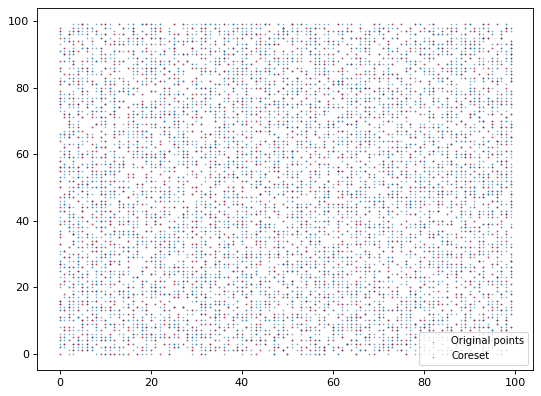

In [56]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(og_xs, og_ys, s=0.1, label="Original points")
plt.scatter(cs_xs, cs_ys, s=0.1, c="red", label="Coreset")
plt.legend(loc="lower right", fontsize=9)